In [3]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/toyota.csv", delimiter=",")
df.head()
#print(df.shape)
#df.columns

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [5]:
df.describe(include="O")

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


In [6]:
print(df["transmission"].unique())
print(df["fuelType"].unique())
print(len(df["engineSize"].unique()))

['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Other' 'Hybrid' 'Diesel']
16


In [7]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [10]:
df_max = df["year"].max()
df_min = df["year"].min()
year_unique = df["year"].unique()
year_range = df_max - df_min
print(year_range)
print(df_max)
print(df_min)
print(len(year_unique))

22
2020
1998
23


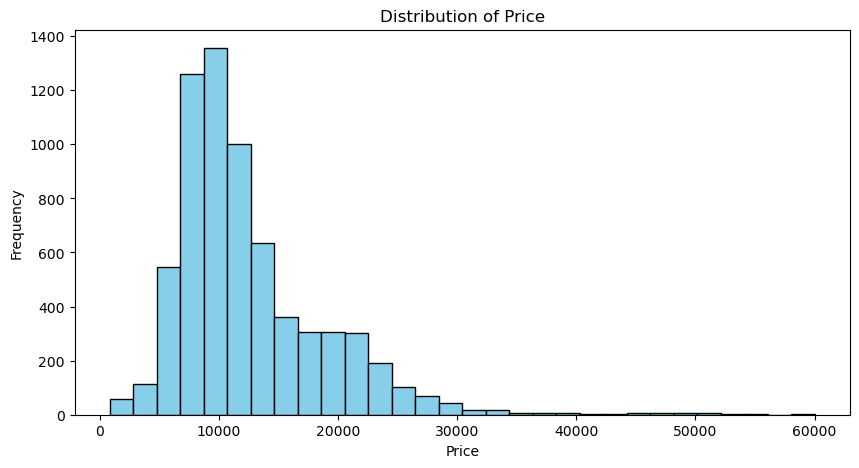

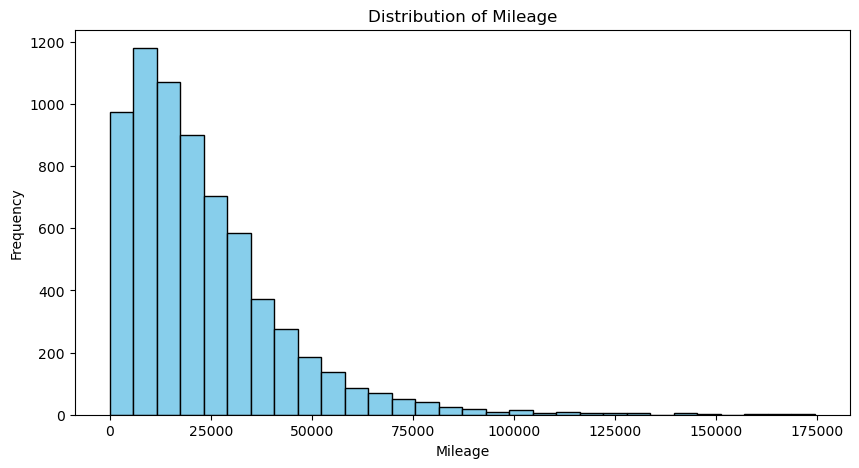

In [15]:
import matplotlib.pyplot as plt

# Plot histogram of price
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of mileage
plt.figure(figsize=(10, 5))
plt.hist(df['mileage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()


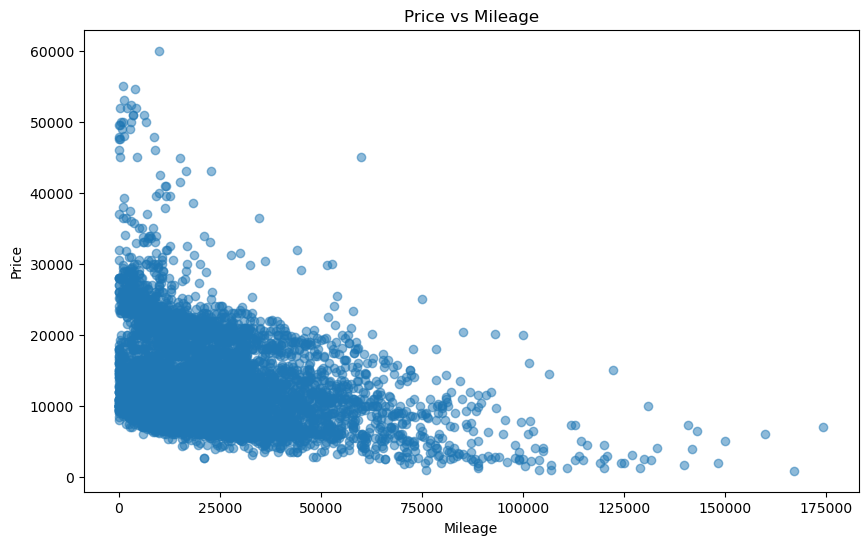

In [21]:
#Multi-Variable Analysis
# Plot scatterplot of price vs mileage
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define features and target
features = ['mileage', 'year', 'tax', 'mpg', 'engineSize']
target = 'price'

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a linear regression model (baseline model)
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Fit a random forest regressor (comparison model)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the models
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Define the business metric
average_resale_value = df['price'].mean()

mae_linear, mae_rf, average_resale_value


(2254.413998121977, 885.66764443101, 12522.3910655981)

How the Sales Differ Between Hybrid Cars and Other Fuel Types?

In [30]:
df = pd.read_csv("toyota_data.csv", delimiter=",")

# Group by fuel type and count the number of cars
sales_by_fuel_type = df['fuelType'].value_counts()

sales_by_fuel_type


Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

How the Sales Differ Between Hybrid Cars and Other Fuel Types?
From the last 6 months' record, more than half of the used cars we sold are using petrol, followed by using hybrid. Also, we can see the number of cars sold in petrol is almost twice the number of cars sold in hybrid. Therefore, we can conclude that there is huge room to impove the sales of hybrid cars.

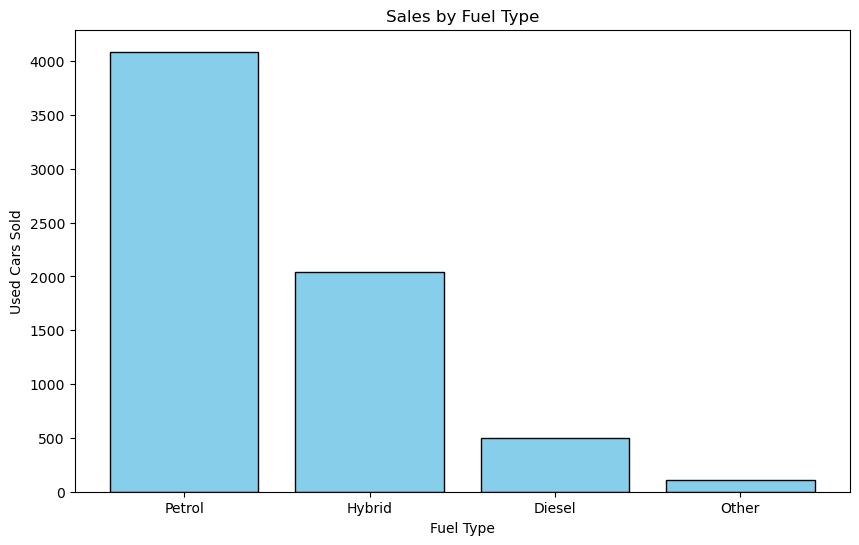

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sales_by_fuel_type.index, sales_by_fuel_type.values, color='skyblue', edgecolor='black')
plt.xlabel('Fuel Type')
plt.ylabel('Used Cars Sold')
plt.title('Sales by Fuel Type')
plt.show()


Here is the bar chart showing the sales of used cars by fuel type. The x-axis represents the fuel type, and the y-axis represents the number of used cars sold. From the chart, we can clearly see that petrol cars have the highest sales, followed by hybrid cars. Diesel cars and cars with other fuel types have significantly fewer sales.

In [35]:
hibrid_car = df[df['fuelType'] == "Hybrid"] 

If we only look at hybrid cars. From the bar chart below, the best seller in car models is Yaris, followed by Auris and C-HR.

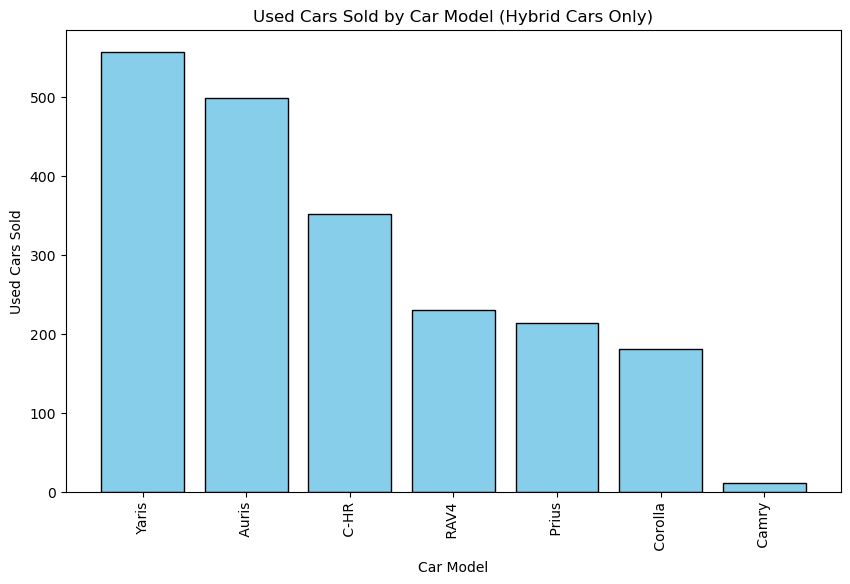

In [36]:
# Filter the DataFrame to include only hybrid cars
hybrid_cars = df[df['fuelType'] == 'Hybrid']

# Count the number of cars sold by model
sales_by_model_hybrid = hybrid_cars['model'].value_counts()

# Plot a bar chart of sales by model for hybrid cars
plt.figure(figsize=(10, 6))
plt.bar(sales_by_model_hybrid.index, sales_by_model_hybrid.values, color='skyblue', edgecolor='black')
plt.xlabel('Car Model')
plt.ylabel('Used Cars Sold')
plt.title('Used Cars Sold by Car Model (Hybrid Cars Only)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.show()


Here is the bar chart showing the sales of used hybrid cars by car model. The x-axis represents the car model, and the y-axis represents the number of used hybrid cars sold. From the chart, we can see that the 'Yaris' model has the highest sales among hybrid cars, followed by the 'C-HR' and 'Auris' models. Other models have significantly fewer sales.

Please note that the x-axis labels (car models) are rotated for readability due to the length of some model names.

In [41]:
# Filter the DataFrame to include only cars sold in the last 6 months
# Assuming the dataset is up to date and 'year' represents the year of manufacture, 
# cars sold in the last 6 months would be those with the highest 'year' values.
"""
most_recent_year = df['year'].max()
six_months_ago_year = most_recent_year if most_recent_year - 0.5 < most_recent_year else most_recent_year - 0.5

recent_sales = df[df['year'] >= six_months_ago_year]

# Plot a histogram of the prices of the cars sold in the last 6 months
plt.figure(figsize=(10, 6))
plt.hist(recent_sales['price'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(30000, color='red', linestyle='dashed', linewidth=2)  # Mark the outlier threshold
plt.xlabel('Price')
plt.ylabel('Number of Cars Sold')
plt.title('Distribution of Prices of Cars Sold in the Last 6 Months')
plt.show()
"""

"\nmost_recent_year = df['year'].max()\nsix_months_ago_year = most_recent_year if most_recent_year - 0.5 < most_recent_year else most_recent_year - 0.5\n\nrecent_sales = df[df['year'] >= six_months_ago_year]\n\n# Plot a histogram of the prices of the cars sold in the last 6 months\nplt.figure(figsize=(10, 6))\nplt.hist(recent_sales['price'], bins=30, color='skyblue', edgecolor='black')\nplt.axvline(30000, color='red', linestyle='dashed', linewidth=2)  # Mark the outlier threshold\nplt.xlabel('Price')\nplt.ylabel('Number of Cars Sold')\nplt.title('Distribution of Prices of Cars Sold in the Last 6 Months')\nplt.show()\n"

We also want to compare the price of all the cars we sold last 6 months. I was looking at the distribution of price. The majority of used cars sold last 6 months is less than 30000 GBP. Used cars sold for more than 30000 GBP could be considered outliers.

In [99]:

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price


(12522.3910655981, 10795.0, 9995)

In [107]:
import scipy.stats as stats

# Calculate the mean and standard deviation of the price
mean_price = df['price'].mean()
std_price = df['price'].std()

# Calculate the standard error
se = std_price / np.sqrt(len(df['price']))

# Calculate the 95% confidence interval
ci = stats.norm.interval(0.95, loc=mean_price, scale=se)

print(ci)
#print('\n')
print(f"The mean price is {mean_price} with a 95% confidence interval of {ci}")


(12370.890094048556, 12673.892037147643)
77.2978344217358
The mean price is 12522.3910655981 with a 95% confidence interval of (12370.890094048556, 12673.892037147643)


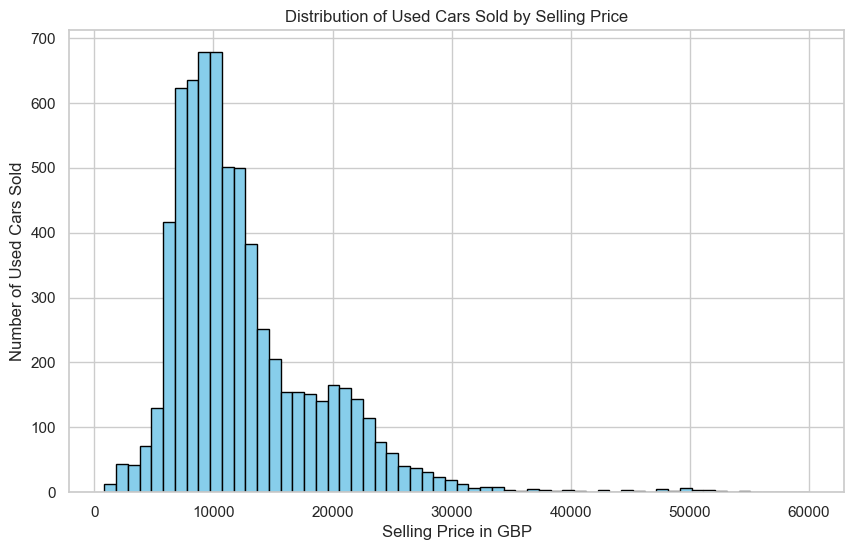

In [98]:
# Plot a histogram of the prices of the cars sold
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=60, color='skyblue', edgecolor='black')
plt.xlabel('Selling Price in GBP')
plt.ylabel('Number of Used Cars Sold')
plt.title('Distribution of Used Cars Sold by Selling Price')
plt.show()


From the multiple boxplots below, we can see the price range in hybrid cars is more significant than other fuel types. The majority of the price of a hybrid car range from 13000 to 21000 GBP, which is higher than petrol and diesel. I am not sure of the meaning of the fuel type in ‘Others,’ so I cannot conclude anything about that type until I have further information.

Petrol cars, the largest rival of the hybrid cars, majorly sold from 9000 to 12000 GBP. But as you can see from this graph, a few hybrid cars are also sold in this range

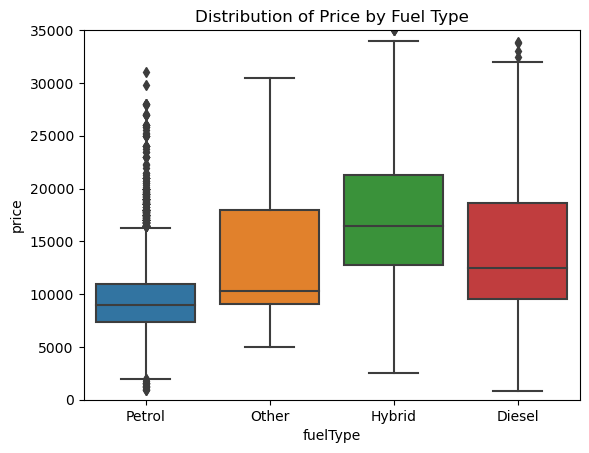

In [47]:
import seaborn as sns

sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Distribution of Price by Fuel Type')
plt.ylim(0, 35000)
plt.show()

How to Make the Hybrid more Attractive?
Since the Hybrid models are more expensive than other types on average, we will find different ways to attract customers. From the multiple boxplots below, Prius, Yaris and Auris have records of selling lower than 10000 GBP in the last 6 months, which is competitive with the petrol cars. Therefore, for people concerned about price, we should make these three models our major campaign car models.

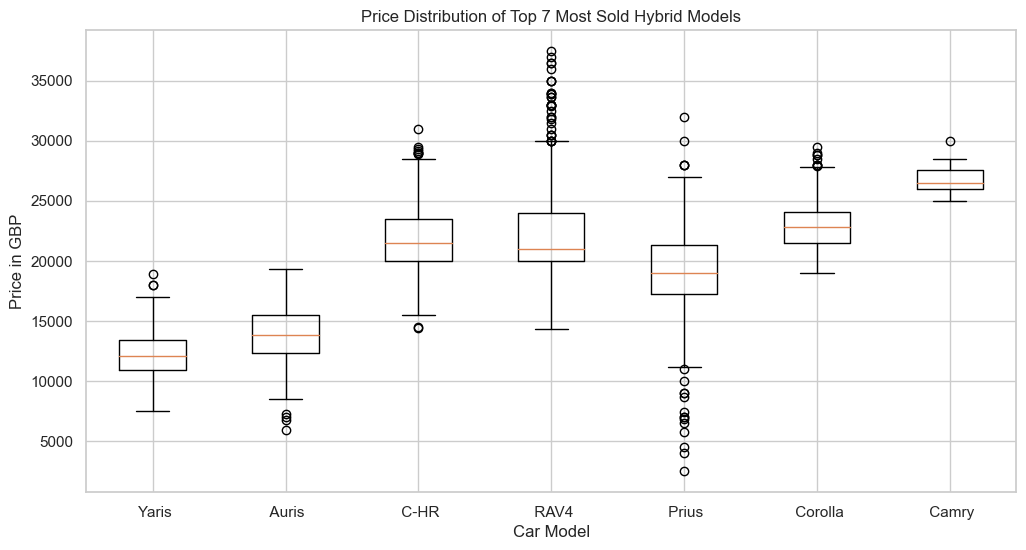

In [111]:
# Filter the DataFrame to include only hybrid cars
hybrid_cars = df[df['fuelType'] == 'Hybrid']

# Get the top 7 most sold hybrid models
top_hybrid_models = hybrid_cars['model'].value_counts().index[:7]

# Filter the DataFrame to include only the top 7 most sold hybrid models
top_hybrid_cars = hybrid_cars[hybrid_cars['model'].isin(top_hybrid_models)]

# Plot a boxplot of price by model for the top 7 most sold hybrid models
plt.figure(figsize=(12, 6))
plt.boxplot([top_hybrid_cars[top_hybrid_cars['model'] == model]['price'] for model in top_hybrid_models], labels=top_hybrid_models)
plt.xlabel('Car Model')
plt.ylabel('Price in GBP')
plt.title('Price Distribution of Top 7 Most Sold Hybrid Models')
plt.show()


The other attractive information is the tax. From the bar chart below, we can see the most common road tax for the petrol model is 145 GBP, while the most common road tax for the hybrid model is 0 GBP. Therefore, for people buying traditional fuel-type car models, a Hybrid might be an excellent choice based on this information

In [63]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [67]:
# Calculate the most common tax for petrol and hybrid cars
common_tax_petrol = df[df['fuelType'] == 'Petrol']['tax'].mode()[0]
common_tax_hybrid = df[df['fuelType'] == 'Hybrid']['tax'].mode()[0]

common_tax_petrol, common_tax_hybrid


(145, 0)

In [73]:
#hybrid_petrol = (df[df['fuelType'] == 'Hybrid'] & df[df['fuelType'] == 'Petrol'])
hybrid_petrol = df[(df['fuelType'] == 'Hybrid') | (df['fuelType'] == 'Petrol')]

hybrid_petrol.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [134]:
petrol_zero_tax = df[(df['fuelType'] == 'Diesel') | (df['tax'] == 0)]
petrol_zero_tax

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
331,Corolla,2005,2495,Manual,88150,Diesel,125,58.9,1.4
342,RAV4,2017,16500,Manual,25271,Diesel,125,60.1,2.0
343,RAV4,2016,15995,Manual,11291,Diesel,125,60.1,2.0
344,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
346,RAV4,2015,13698,Automatic,43830,Diesel,260,42.2,2.2
...,...,...,...,...,...,...,...,...,...
6727,IQ,2009,3495,Manual,43000,Petrol,0,65.7,1.0
6728,IQ,2009,2699,Manual,74095,Petrol,0,65.7,1.0
6730,IQ,2013,4849,Manual,41142,Petrol,0,64.2,1.0
6732,IQ,2012,2495,Manual,72498,Petrol,0,64.2,1.0


In [130]:
#CARS ZERO TAX
tax_zero_cars = filtered_data[filtered_data['tax'] == 0]

# Display the car models that have a tax value of 0
tax_zero_cars['model'].unique()

array([' Yaris', ' Auris', ' Aygo', ' C-HR', ' Prius', ' IQ'],
      dtype=object)

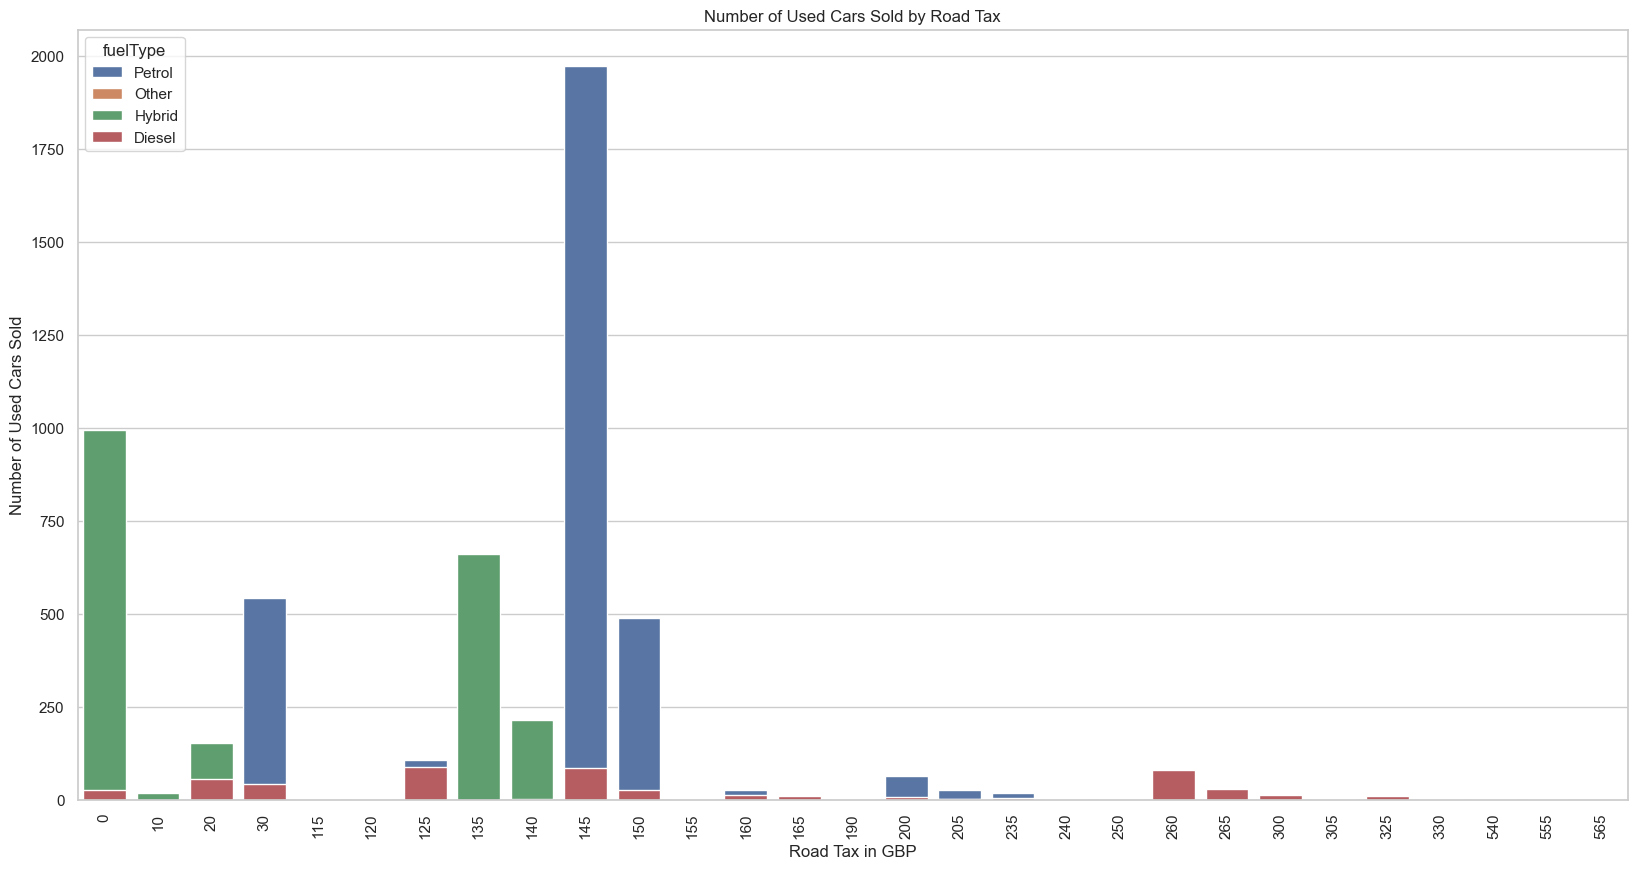

In [131]:


# Filter dataframe for only Hybrid, Petrol, Diesel and Other cars
fuel_types = ['Hybrid', 'Petrol', 'Diesel', 'Other']
filtered_data = df[df['fuelType'].isin(fuel_types)]

# Create the bar plot
plt.figure(figsize=(20,10))
sns.countplot(data=filtered_data, x='tax', hue='fuelType', dodge=False)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Setting the title and labels
plt.title('Number of Used Cars Sold by Road Tax')
plt.xlabel('Road Tax in GBP')
plt.ylabel('Number of Used Cars Sold')



# Show the plot
plt.show()





Business Metrics
Since our goal is to increase the number of sales of hybrid and electric cars next year, I would recommend we use the percentage of hybrid and electric cars in total number of used cars sold last 6 months as our metric.

Based on our last 6 month data, 30% of the used cars sold are hybrid and electric cars. Therefore, if this number is increasing next 6 month, it indicates very good sign to achieve our goal.

Recommendation
For the following weeks, I would recommend we can focus on the following steps:

Using key metrics to monitor whether there is a strong sign to see the sales will increase.
To implement the campaign as soon as possible, we should smartly promote the hybrid models in the market:
Promoting road tax reduction
Less expensive models -Prius, Yaris and Auris model
Stay on top of the current electric and hybrid car markets so that the newest information can be integrated in the campaign.
Data Collection for in-depth analysis
Improve data quality - what the other fuel type means?
New related data - Using different fuel types in the same car model to compare eco-friendly cars and other fuel types

When you have finished...
Publish your Workspace using the option on the left
Check the published version of your report:
Can you see everything you want us to grade?
Are all the graphics visible?
Review the grading rubric. Have you included everything that will be graded?
Head back to the Certification Dashboard to submit your practical exam report and record your presentation

In [138]:


# Count the total number of cars
total_cars = df.shape[0]

# Count the number of hybrid and electric cars
hybrid_electric_cars = df[df['fuelType'].isin(['Hybrid', 'Electric'])].shape[0]

# Calculate the percentage of hybrid and electric cars
percentage_hybrid_electric = (hybrid_electric_cars / total_cars) * 100

percentage_hybrid_electric


30.320569902048085